In [1]:
import matplotlib.pyplot as plt # 3.4.1 !!!!
import pandas as pd

In [2]:
path = './train.json'
train = pd.read_json(path)

pd.set_option("max_colwidth", 200)

train.head()

id      cuisine  \
0  10259        greek   
1  25693  southern_us   
2  20130     filipino   
3  22213       indian   
4  13162       indian   

                                                                                                                                                                                               ingredients  
0                                                                           [romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]  
1                                                                    [plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]  
2                                                     [eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]  
3                                                                                                                                                                      [water, vegetable oil, wheat, salt]  
4  [black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam m...

In [3]:
train = train.drop(columns=['id'])

train.head(10)

cuisine  \
0        greek   
1  southern_us   
2     filipino   
3       indian   
4       indian   
5     jamaican   
6      spanish   
7      italian   
8      mexican   
9      italian   

                                                                                                                                                                                               ingredients  
0                                                                           [romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]  
1                                                                    [plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]  
2                                                     [eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]  
3                                                                                                                                                                      [water, vegetable oil, wheat, salt]  
4  [black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam m...  
5                                                        [plain flour, sugar, butter, eggs, fresh ginger root, salt, ground cinnamon, milk, vanilla extract, ground ginger, powdered sugar, baking powder]  
6                                 [olive oil, salt, medium shrimp, pepper, garlic, chopped cilantro, jalapeno chilies, flat leaf parsley, skirt steak, white vinegar, sea salt, bay leaf, chorizo sausage]  
7                                                                    [sugar, pistachio nuts, white almond bark, flour, vanilla extract, olive oil, almond extract, eggs, baking powder, dried cranberries]  
8            [olive oil, purple onion, fresh pineapple, pork, poblano peppers, corn tortillas, cheddar cheese, ground black pepper, salt, iceberg lettuce, lime, jalapeno chilies, chopped cilantro fresh]  
9                                                                                                          [chopped tomatoes, fresh basil, garlic, extra-virgin olive oil, kosher salt, flat leaf parsley]

In [4]:
# ispisimo prvih par recepata

for _, row in train.tail(20).iterrows():
  print(row[0], ':', row[1], end='\n\n')

vietnamese : ['jasmine rice', 'bay leaves', 'sticky rice', 'rotisserie chicken', 'chopped cilantro', 'large eggs', 'vegetable oil', 'yellow onion', 'beansprouts', 'lime', 'savory', 'salt', 'carrots', 'pepper', 'green onions', 'ginger', 'garlic cloves', 'peppercorns']

indian : ['mint leaves', 'cilantro leaves', 'ghee', 'tomatoes', 'cinnamon', 'oil', 'basmati rice', 'garlic paste', 'salt', 'coconut milk', 'clove', 'bay leaves', 'green chilies', 'onions']

mexican : ['vegetable oil', 'cinnamon sticks', 'water', 'all-purpose flour', 'piloncillo', 'salt', 'orange zest', 'baking powder', 'hot water']

greek : ['red bell pepper', 'garlic cloves', 'extra-virgin olive oil', 'feta cheese crumbles']

greek : ['milk', 'salt', 'ground cayenne pepper', 'ground lamb', 'ground cinnamon', 'ground black pepper', 'pomegranate', 'chopped fresh mint', 'pitas', 'ground coriander', 'fresh mint', 'ground cumin', 'kosher salt', 'purple onion', 'greek yogurt', 'canola oil']

korean : ['red chili peppers', 'sea

In [5]:
# pogledajmo koliko ima cega u dataset

print("Broj recepata (redaka)", len(train))

from collections import Counter

ingridients_counter = Counter(ingridient for ingridients_list in train['ingredients'] for ingridient in ingridients_list)

print("Broj jedinstvenih sastojaka", len(ingridients_counter))

Broj recepata (redaka) 39774
Broj jedinstvenih sastojaka 6714


Pogledajmo balans dataseta

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64


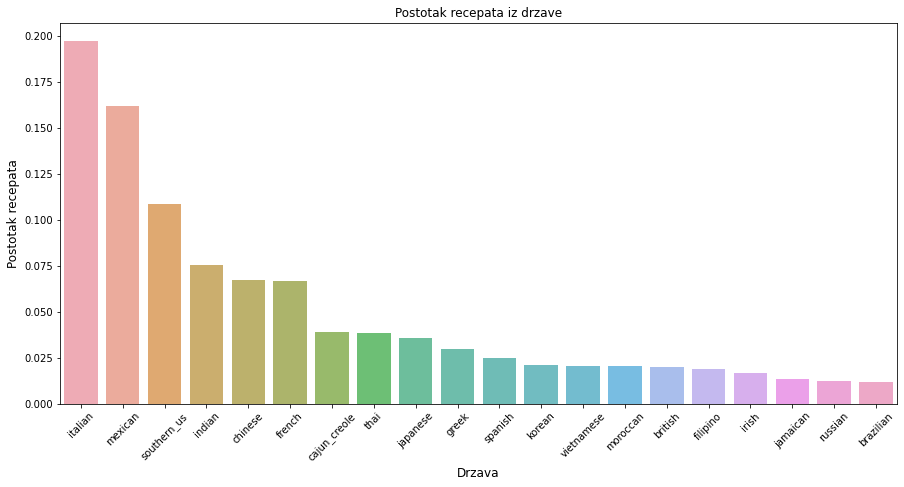

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cuisine_count = train['cuisine'].value_counts()

print(cuisine_count)

plt.figure(figsize=(15,7))

barplot = sns.barplot(x = cuisine_count.index, y = cuisine_count.values / len(train), alpha = 0.8)
plt.title('Postotak recepata iz drzave')
plt.ylabel('Postotak recepata', fontsize=12)
plt.xlabel('Drzava', fontsize=12)

for label in barplot.get_xticklabels():
    label.set_rotation(45)

plt.show()

Vidimo da je skup podataka lagano imbalansiran. Italian, mexican i southern_us recepata ima znacajno vise od ostalih

Pogledajmo kako se krecu broj pojavljivanja pojedinih sastojaka.

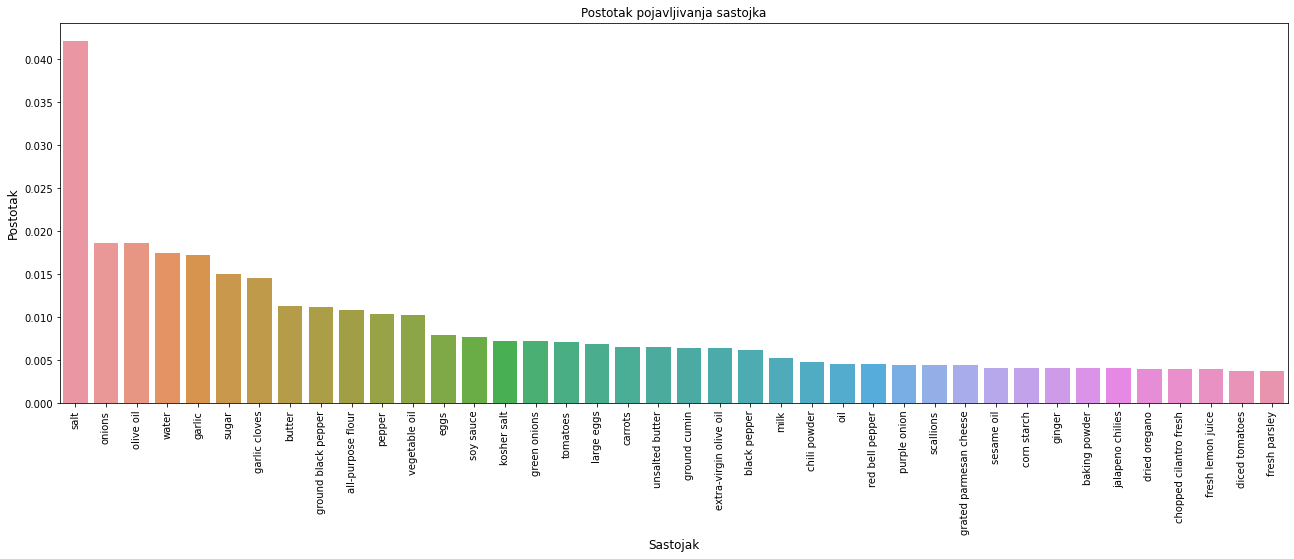

In [7]:
from collections import Counter

ingridients_counter = Counter(ingridient 
                              for ingridients_list in train['ingredients'] 
                              for ingridient in ingridients_list)

total_cnt = sum([x[1] for x in ingridients_counter.most_common()])

n = 40
most_common_n = ingridients_counter.most_common(n)

plt.figure(figsize=(22,7))

barplot = sns.barplot(x = [x[0] for x in most_common_n], y = [x[1] / total_cnt for x in most_common_n])

for label in barplot.get_xticklabels():
    label.set_rotation(90)

plt.title('Postotak pojavljivanja sastojka')
plt.ylabel('Postotak', fontsize=12)
plt.xlabel('Sastojak', fontsize=12)

plt.show()

Pogledajmo distribuciju broja sastojaka po receptu

<AxesSubplot:xlabel='ingridients_cnt', ylabel='Count'>

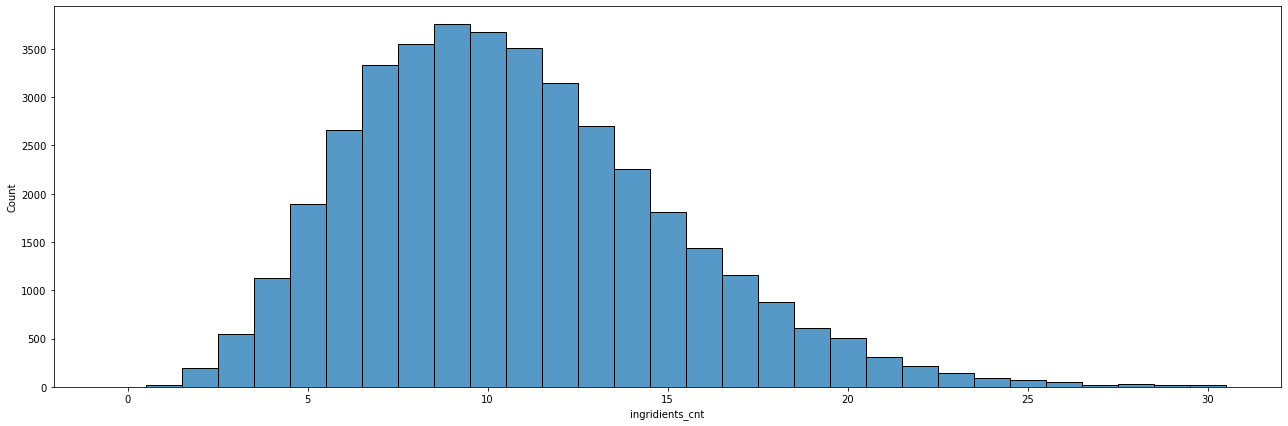

In [8]:
train['ingridients_cnt'] = train['ingredients'].apply(len)

plt.figure(figsize=(22,7))

sns.histplot(data=train, x='ingridients_cnt', bins=32, binrange=(0, 30), discrete=True)

Pogledajmo koliko su "cista" imena sastojaka, vidimo da imamo garlic i garlic cloves sto je zapravo isti sastojak

In [9]:
for word, cnt in ingridients_counter.most_common():
  if word.replace("-", " ").replace(" ", "").isalpha() == False:
    print(word, ' :: ', cnt)

half & half  ::  337
1% low-fat milk  ::  193
cream cheese, soften  ::  143
whole kernel corn, drain  ::  106
2% reduced-fat milk  ::  71
green bell pepper, slice  ::  49
roast red peppers, drain  ::  46
hellmann' or best food real mayonnais  ::  37
boneless, skinless chicken breast  ::  36
lasagna noodles, cooked and drained  ::  26
soft goat's cheese  ::  23
Country Crock® Spread  ::  21
frozen chopped spinach, thawed and squeezed dry  ::  21
clove garlic, fine chop  ::  20
uncook medium shrimp, peel and devein  ::  19
red kidnei beans, rins and drain  ::  18
I Can't Believe It's Not Butter!® Spread  ::  18
Bertolli® Classico Olive Oil  ::  16
dri oregano leaves, crush  ::  16
1% low-fat cottage cheese  ::  12
Old El Paso™ chopped green chiles  ::  12
hellmann' or best food light mayonnais  ::  12
(    oz.) tomato sauce  ::  11
egg noodles, cooked and drained  ::  11
Old El Paso™ taco seasoning mix  ::  11
water chestnuts, drained and chopped  ::  10
Pillsbury™ Refrigerated Crescent 

Jesu li nam bitni brojevi u sastojcima? <br/><br/>
Jesu li nam bitni pridjevi uz sastojak npr. <br/>
tuna, drain and flake </br>
dri basil leaves, crush <br/>
pork chops, 1 inch thick <br/>
fettuccine, cook and drain <br/><br/>
To vjerojatno treba izbaciti <br/><br/>

Garlic i garlic cloves vjerojatno mozemo spojiti

In [10]:
import re

stop_words = ['cook', 'and', 'drain', 'undrain', 'rins', 'scrubbed', 'well', 'sliced',
              'split', 'toasted', 'cut', 'into', 'diced', 'crush', 'crisp-cooked', 'crumbled', 'rins',
              'well', 'scrub', 'well scrubbed', 'chopped', 'peel', 'fine', 'soften', 'finely', 'chopped',
              'minced', 'extra-virgin', 'fresh', 'old el paso™', 'smoked', 'dried', '&', 'thick', 'chunkcy', '\'']

replacement = {'garlic cloves': 'garlic', 'onions': 'onion'}

def remove_text_inside_parentheses(text):
    return re.sub("[\(\[].*?[\)\]]", "", text)

def clean_ingridients_list(ingridients, stop_words=stop_words, replacement=replacement):
  ret = []
  for ingridient in ingridients:
    splitted = ingridient.replace(',', ' ').lower()
    for stop_word in stop_words:
        splitted = splitted.replace(stop_word, '')

    cleaned = remove_text_inside_parentheses(splitted)
    ret.append(replacement.get(cleaned, cleaned))
    
  return ret

train['cleaned_ing'] = train['ingredients'].apply(clean_ingridients_list)

cleaned_ingridients_counter = Counter(ingridient 
                                      for ingridients_list in train['cleaned_ing'] 
                                      for ingridient in ingridients_list)

print("Broj jedinstvenih sastojaka", len(cleaned_ingridients_counter))

for word, cnt in cleaned_ingridients_counter.most_common():
  if word.replace("-", " ").replace(" ", "").isalpha() == False:
    print(word, ' :: ', cnt)


Broj jedinstvenih sastojaka 6637
1% low-fat milk  ::  193
2% reduced-fat milk  ::  71
country crock® spread  ::  21
i cant believe its not butter!® spread  ::  18
bertolli® classico olive oil  ::  16
1% low-fat cottage cheese  ::  12
pillsbury™ refrigerated crescent dinner rolls  ::  10
mexican style 4 cheese blend  ::  9
bertolli® alfredo sauce  ::  8
oreo® ies  ::  7
40% less sodium taco seasoning  ::  7
hellmanns® real mayonnaise  ::  6
2% low-fat cottage cheese  ::  6
red gold®  tomatoes  ::  5
spring! water  ::  5
40% less sodium taco seasoning mix  ::  5
sheep’s milk cheese  ::  4
1% low-fat buttermilk  ::  4
hidden valley® original ranch® dressing  ::  4
i cant believe its not butter!® all purpose sticks  ::  4
95% lean ground beef  ::  4
7 up  ::  4
bengali 5 spice  ::  4
franks® redhot® original cayenne pepper sauce  ::  4
mrs. dash  ::  4
25% less sodium chicken broth  ::  3
lipton® recipe secrets® onion soup mix  ::  3
33% less sodium ham  ::  3
eggls best® eggs  ::  3
hidde

Trebati ce se ozbiljnije posvetiti ciscenju podataka na sistematican nacin : micanjem pridjeva, brojeva, ali treba paziti, mozda je npr. goat cheese popularan u nekoj kuhinji. Mozda napraviti nesto sistematicno za sastojke koji se malo puta pojavljuju

/home/ltomic/anaconda3/envs/vjezbe/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


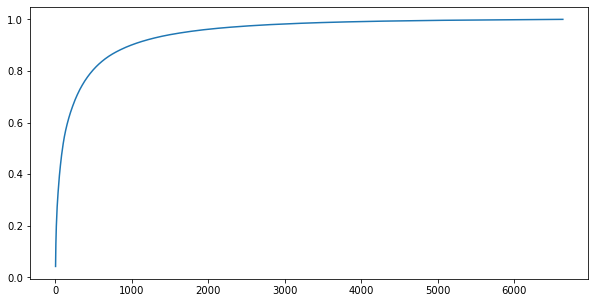

In [11]:
cumul = [x[1] for x in cleaned_ingridients_counter.most_common()]

total_cnt = sum(cumul)

n_ing = len(cleaned_ingridients_counter.most_common())

for i in range(1, n_ing):
    cumul[i] = cumul[i] + cumul[i-1]

cumul = [x / total_cnt for x in cumul]

fig, ax = plt.subplots(figsize=(10, 5))

x = range(1, n_ing+1)
ax.plot(x, cumul)


fig.show()

Vidimo da vec prvih 500 sastojaka cini veliki dio ukupnog broja, vjerojatno ce biti korisno odbaciti neku dio sastojaka

Pogledajmo kako se krece popularnost najcescih sastojaka u tri najvece kuhinje

6637


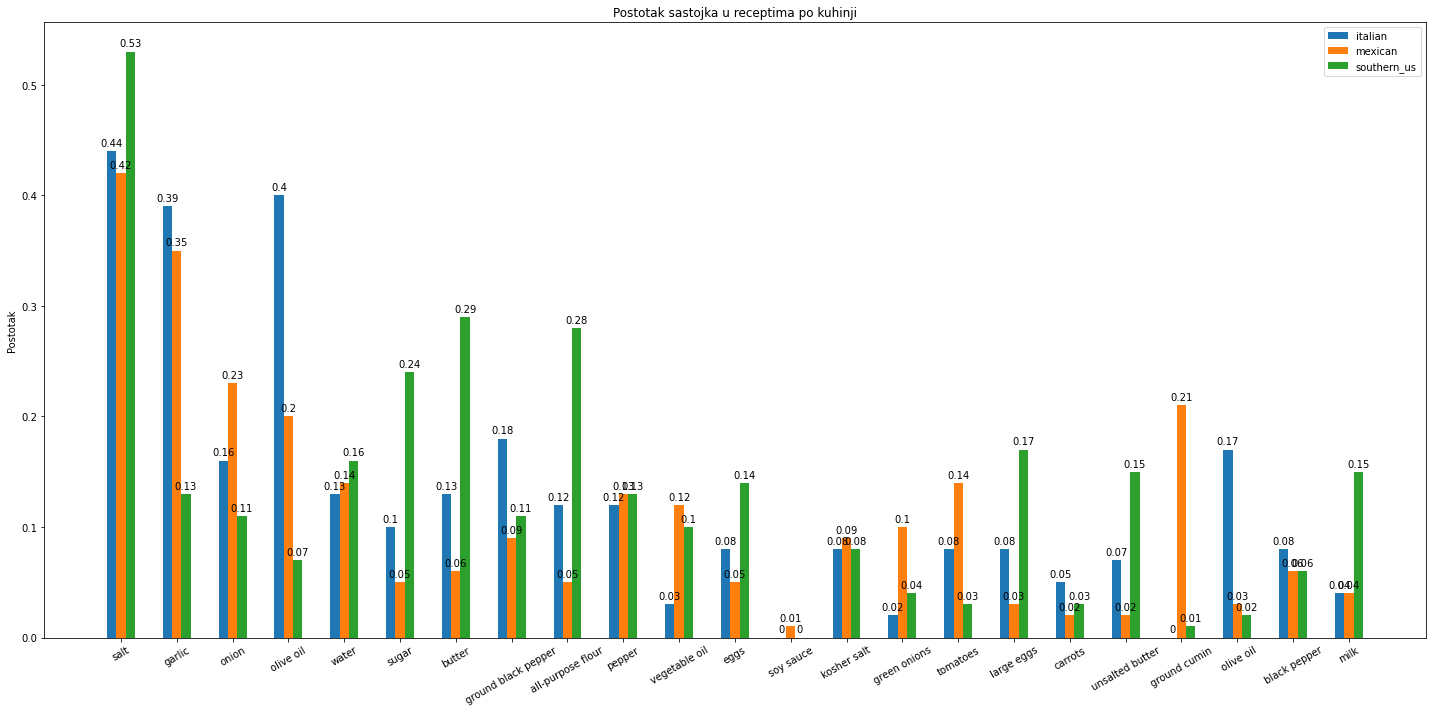

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

n = 23;
n_cuisines = 3
 
ingridients_counter = Counter(ingridient for ingridients_list in train['cleaned_ing'] for ingridient in ingridients_list)

print(len(ingridients_counter))

most_common_n = ingridients_counter.most_common(n)

cuisines = list(train['cuisine'].value_counts()[:n_cuisines].index)

counted = dict()
for cuisine in cuisines:
  filtered = train[train['cuisine'] == cuisine]
  
  counter = Counter(ingridient for ingridients_list in filtered['cleaned_ing'] for ingridient in ingridients_list)
  counts = dict(counter)

  counted[cuisine] = [round(counts.get(ing, 0) / len(filtered), 2) for ing, _ in most_common_n]
x = np.arange(len(most_common_n))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))

for ind, cuisine in enumerate(cuisines):
  rects = ax.bar(x + (-1 + ind) * width / n_cuisines, counted[cuisine], width / n_cuisines, label=cuisine)
#  rects2 = ax.bar(x + width/2, women_means, width, label='Women')

  ax.bar_label(rects, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Postotak')
ax.set_title('Postotak sastojka u receptima po kuhinji')
ax.set_xticks(x)
ax.set_xticklabels([ing for ing, _ in most_common_n], rotation=30)
ax.legend()


fig.tight_layout()

plt.show()


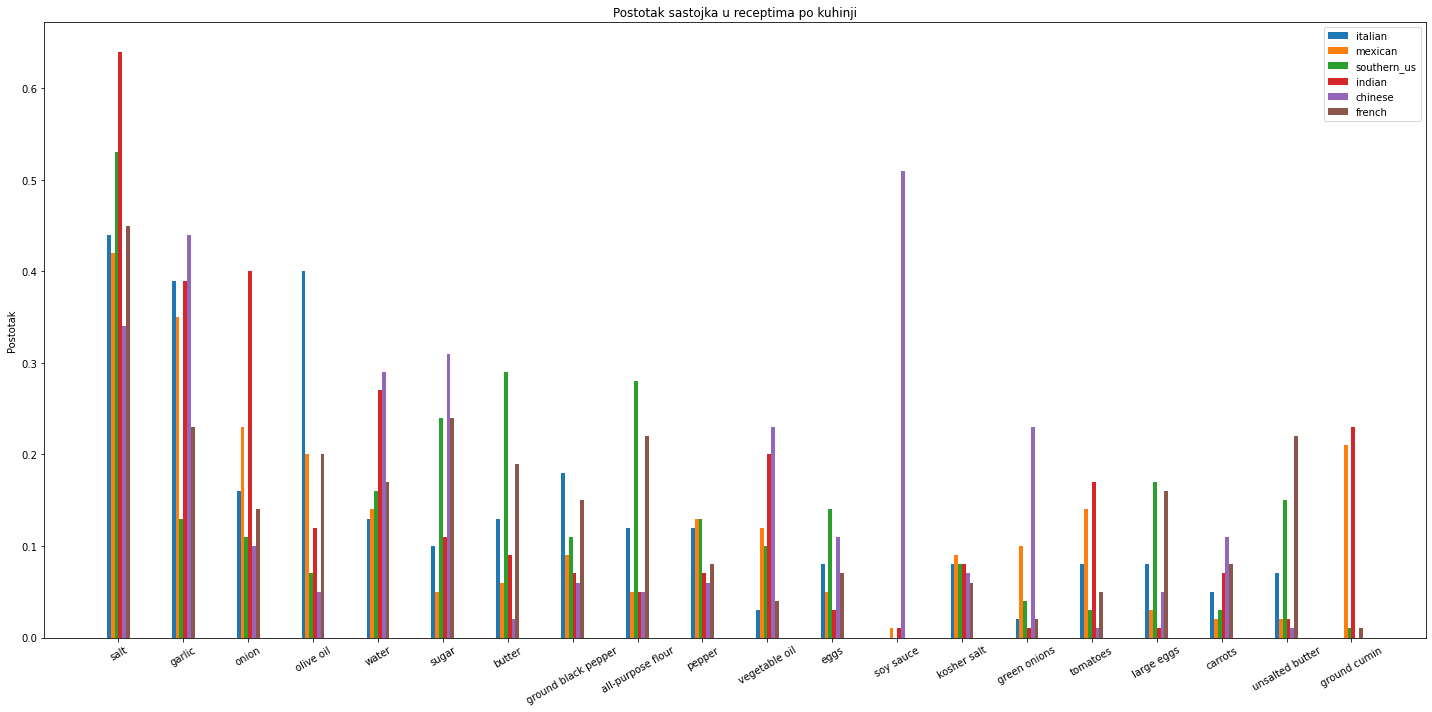

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

n = 20;
n_cuisines = 6
 
ingridients_counter = Counter(ingridient for ingridients_list in train['cleaned_ing'] for ingridient in ingridients_list)

most_common_n = ingridients_counter.most_common(n)

cuisines = list(train['cuisine'].value_counts()[:n_cuisines].index)

counted = dict()
for cuisine in cuisines:
  filtered = train[train['cuisine'] == cuisine]
  
  counts = dict(Counter(ingridient for ingridients_list in filtered['cleaned_ing'] for ingridient in ingridients_list))
  counted[cuisine] = [round(counts.get(ing, 0) / len(filtered), 2) for ing, _ in most_common_n]

x = np.arange(len(most_common_n))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))

for ind, cuisine in enumerate(cuisines):
  rects = ax.bar(x + (-n_cuisines//2 + ind + 0.5) * width / n_cuisines, counted[cuisine], width / n_cuisines, label=cuisine)

ax.set_ylabel('Postotak')
ax.set_title('Postotak sastojka u receptima po kuhinji')
ax.set_xticks(x)
ax.set_xticklabels([ing for ing, _ in most_common_n], rotation=30)
ax.legend()


fig.tight_layout()

plt.show()


In [14]:
ingridients_counter = Counter(ingridient for ingridients_list in train['cleaned_ing'] for ingridient in ingridients_list)

print("Broj jedinstvenih sastojaka", len(ingridients_counter))

Broj jedinstvenih sastojaka 6637


In [15]:
train['set_ing'] = train['cleaned_ing'].apply(set)

train.head()

cuisine  \
0        greek   
1  southern_us   
2     filipino   
3       indian   
4       indian   

                                                                                                                                                                                               ingredients  \
0                                                                           [romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]   
1                                                                    [plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]   
2                                                     [eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]   
3                                                                                                                                                                      [water, vegetable oil, wheat, salt]   
4  [black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam m...   

   ingridients_cnt  \
0                9   
1               11   
2               12   
3                4   
4               20   

                                                                                                                                                                                               cleaned_ing  \
0                                                                           [romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]   
1                                                                    [plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]   
2                                                         [eggs, pepper, salt, mayonaise, ing oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]   
3                                                                                                                                                                      [water, vegetable oil, wheat, salt]   
4  [black pepper, shallots, cornflour, cayenne pepper, onion, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam ma...   

                                                                                                                                                                                                   set_ing  
0                                                                           {grape tomatoes, garbanzo beans, black olives, garlic, pepper, purple onion, feta cheese crumbles, seasoning, romaine lettuce}  
1                                                                    {milk, yellow corn meal, tomatoes, thyme, ground pepper, green tomatoes, plain flour, vegetable oil, salt, eggs, ground black pepper}  
2                                                         {yellow onion, garlic powder, soy sauce, green chilies, butter, chicken livers, pepper, salt, ing oil, mayonaise, eggs, grilled chicken breasts}  
3                                                                                                                                                                      {salt, wheat, water, vegetable oil}  
4  {milk, lemon juice, passata, cayenne pepper, chili powder, bay leaf, oil, butter, black pepper, ground cumin, onion, natural yogurt, boneless chicken skinless thigh, double cream, shallots, salt, ...

In [16]:
from scipy.sparse import coo_matrix
import numpy as np

sample = train

ingridients_counter = Counter(ingridient 
                              for ingridients_list in sample['cleaned_ing'] 
                              for ingridient in ingridients_list)

n = 50

most_common_ing = ingridients_counter.most_common(n)

ing_index = dict(zip(
    [x[0] for x in most_common_ing], 
    range(len(most_common_ing))))

def ing_indices(i, ing_set):
  return [(i, ing_index.get(ing)) for ing in ing_set if ing in ing_index]

rowind_colind_list = ([pair 
                       for pair_list in [ing_indices(cnt, ing_set) for cnt, ing_set in enumerate(sample['set_ing'])] 
                       for pair in pair_list])

row = [x[0] for x in rowind_colind_list]
col = [x[1] for x in rowind_colind_list]
data = [1] * len(row)

recepie_ing_mat = coo_matrix((data, (row, col)), shape=(len(sample), len(most_common_ing)), dtype=bool)

In [17]:
spojeno = pd.concat([train, pd.DataFrame(recepie_ing_mat.todense())], axis=1).drop(columns=['cuisine', 'ingredients', 'ingridients_cnt', 'cleaned_ing', 'set_ing'])

spojeno.head()

0      1      2      3      4      5      6      7      8      9   ...  \
0  False   True  False  False  False  False  False  False  False   True  ...   
1   True  False  False  False  False  False  False   True  False  False  ...   
2   True  False  False  False  False  False   True  False  False   True  ...   
3   True  False  False  False   True  False  False  False  False  False  ...   
4   True  False   True  False   True  False   True  False  False  False  ...   

      40     41     42     43     44     45     46     47     48     49  
0  False  False  False  False  False  False  False  False  False  False  
1  False  False  False  False  False  False  False  False  False  False  
2  False  False  False  False  False  False  False  False  False  False  
3  False  False  False  False  False  False  False  False  False  False  
4  False  False  False  False  False   True  False  False   True  False  

[5 rows x 50 columns]

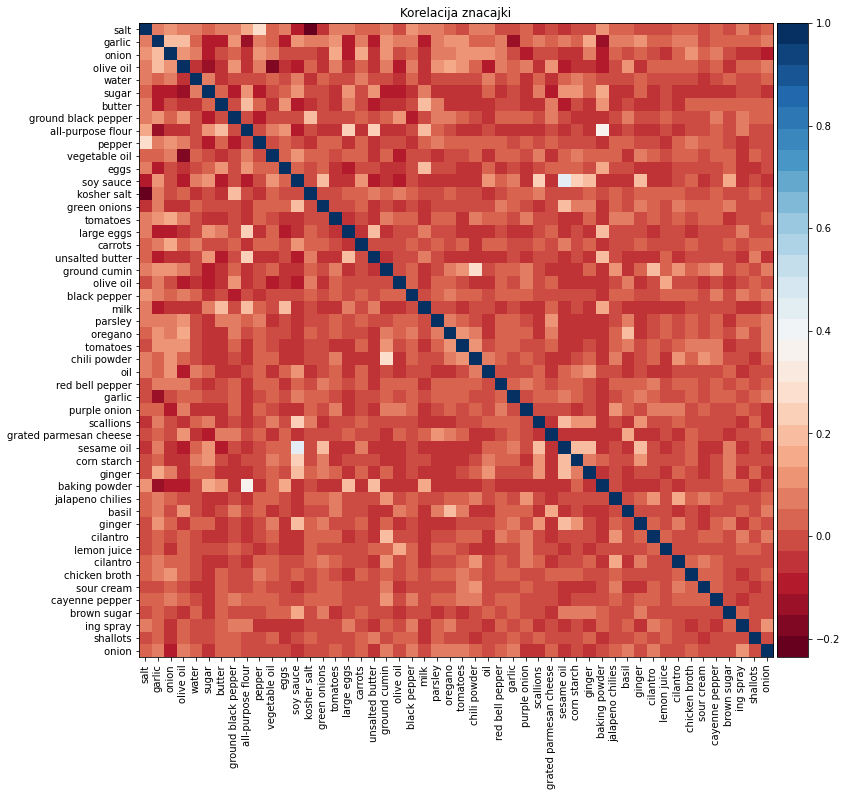

In [18]:
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

corr = spojeno.corr()

cmap = cm.get_cmap('RdBu', 30)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
iax = ax.imshow(corr, interpolation="nearest", cmap=cmap)

ax.grid(False)
ax.set(title='Korelacija znacajki')
ax.set_xticks(range(n))
ax.set_xticklabels([x[0] for x in most_common_ing], rotation=90)
ax.set_yticks(range(n))
ax.set_yticklabels([x[0] for x in most_common_ing])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(iax,cax)
plt.show()


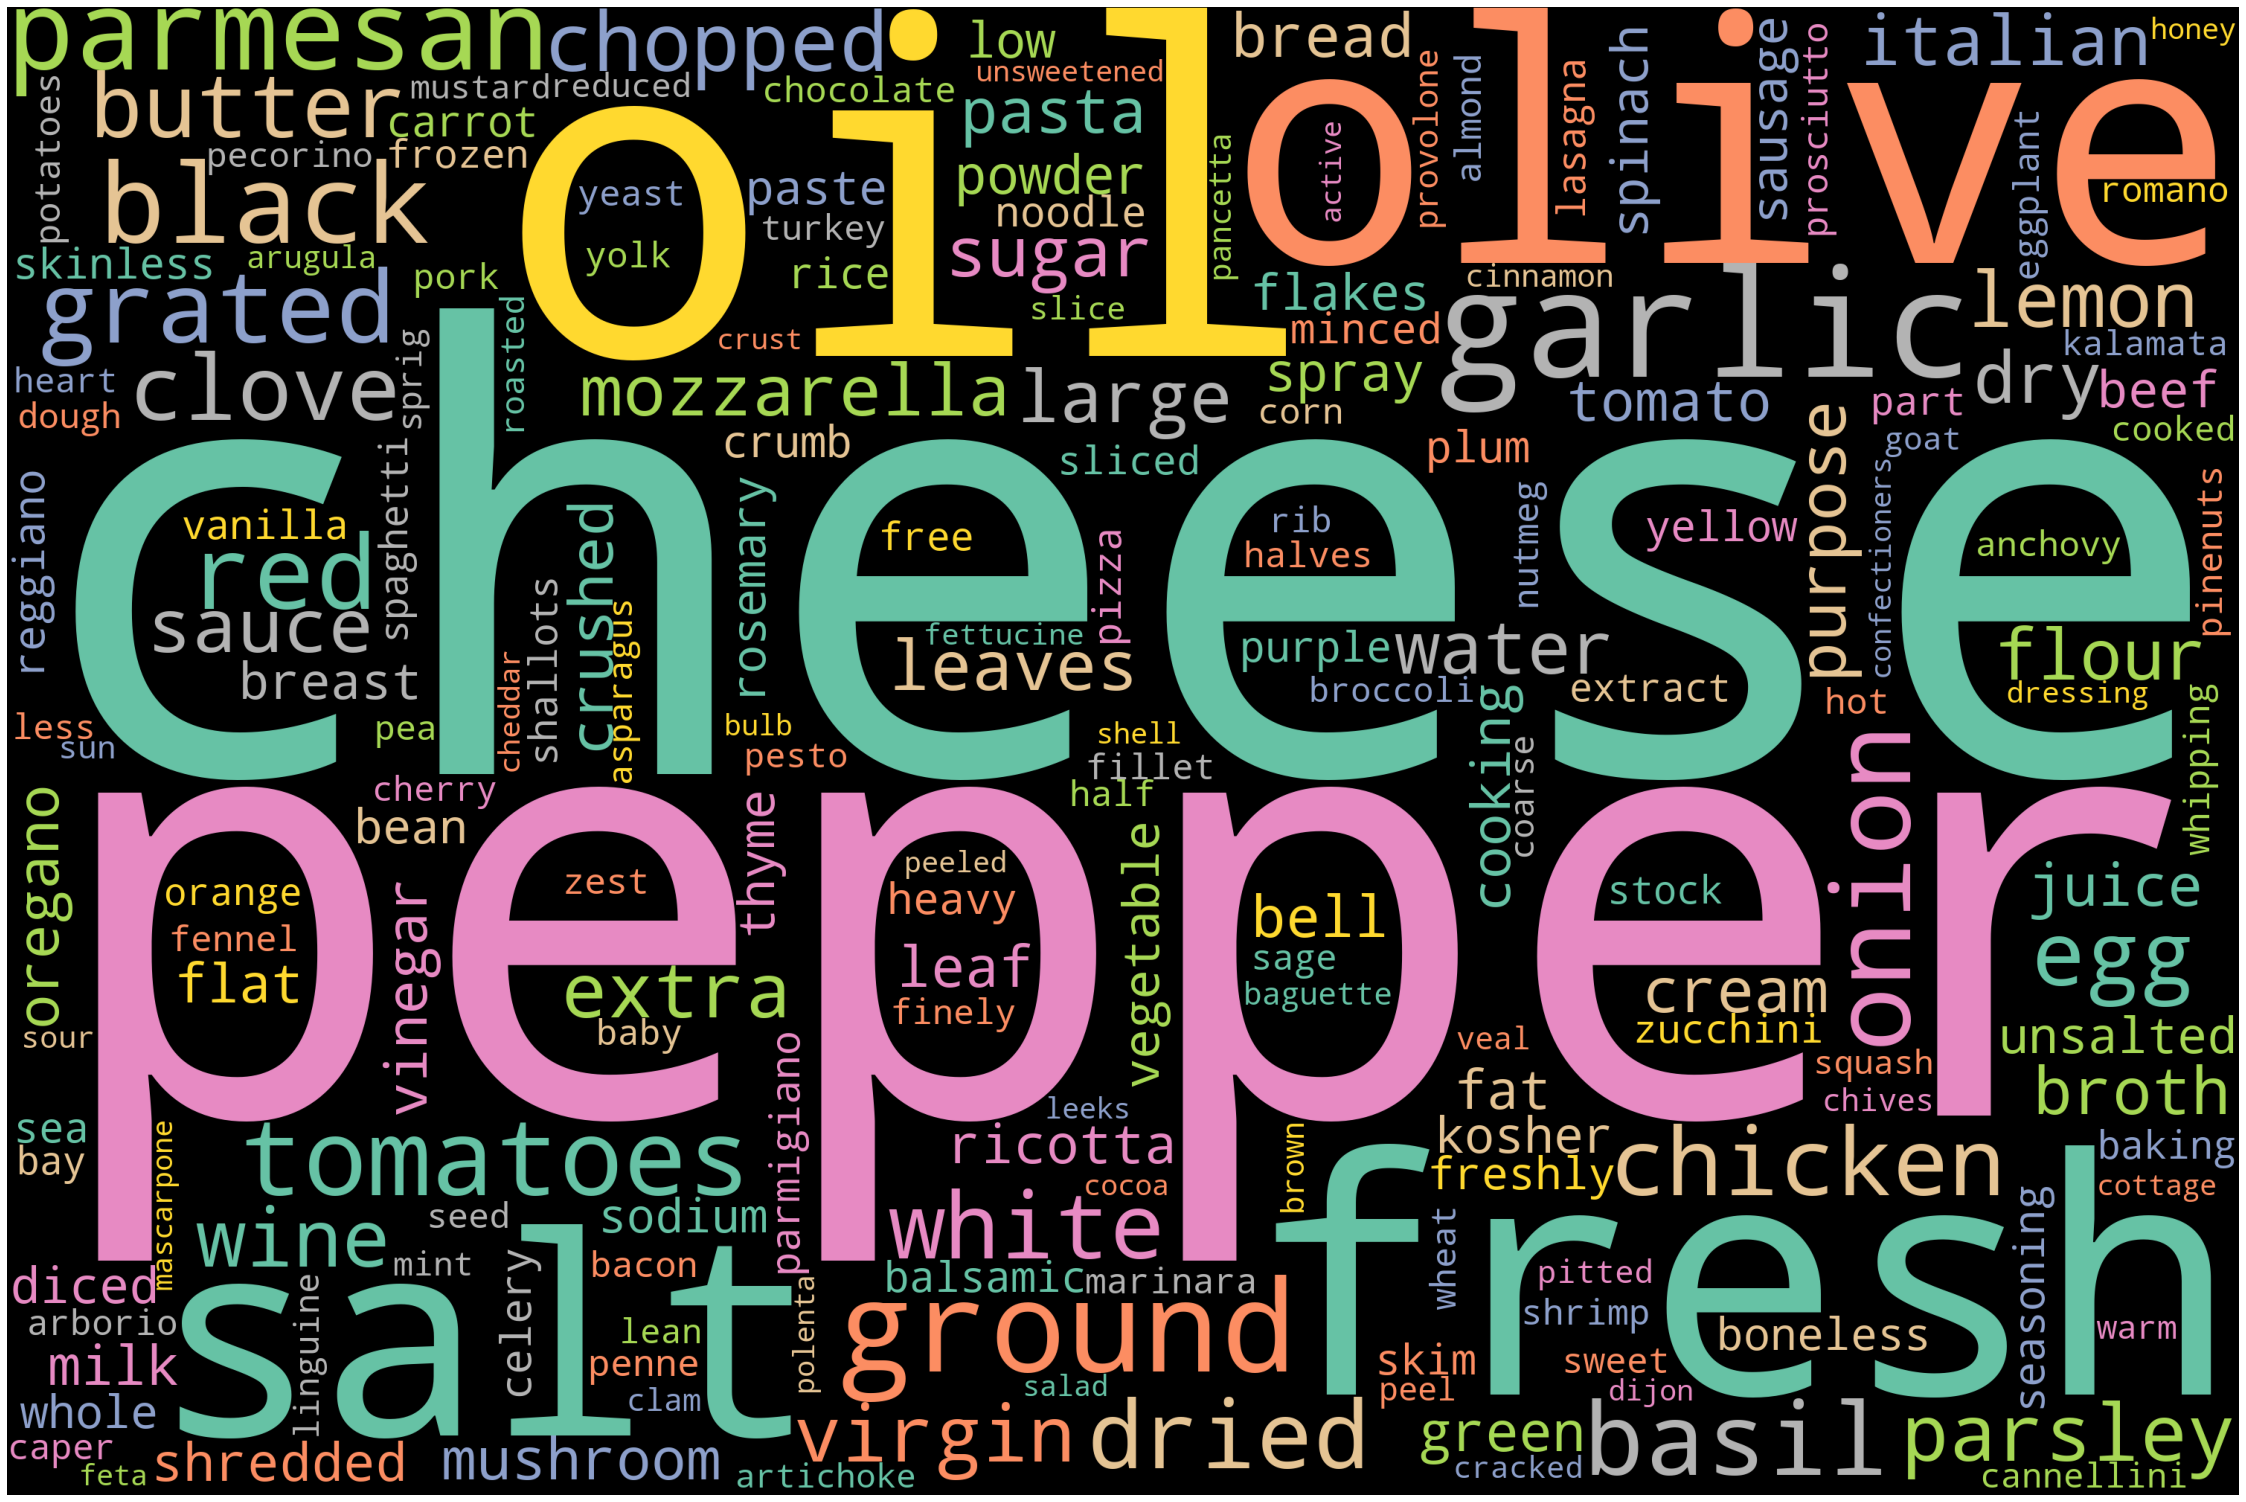

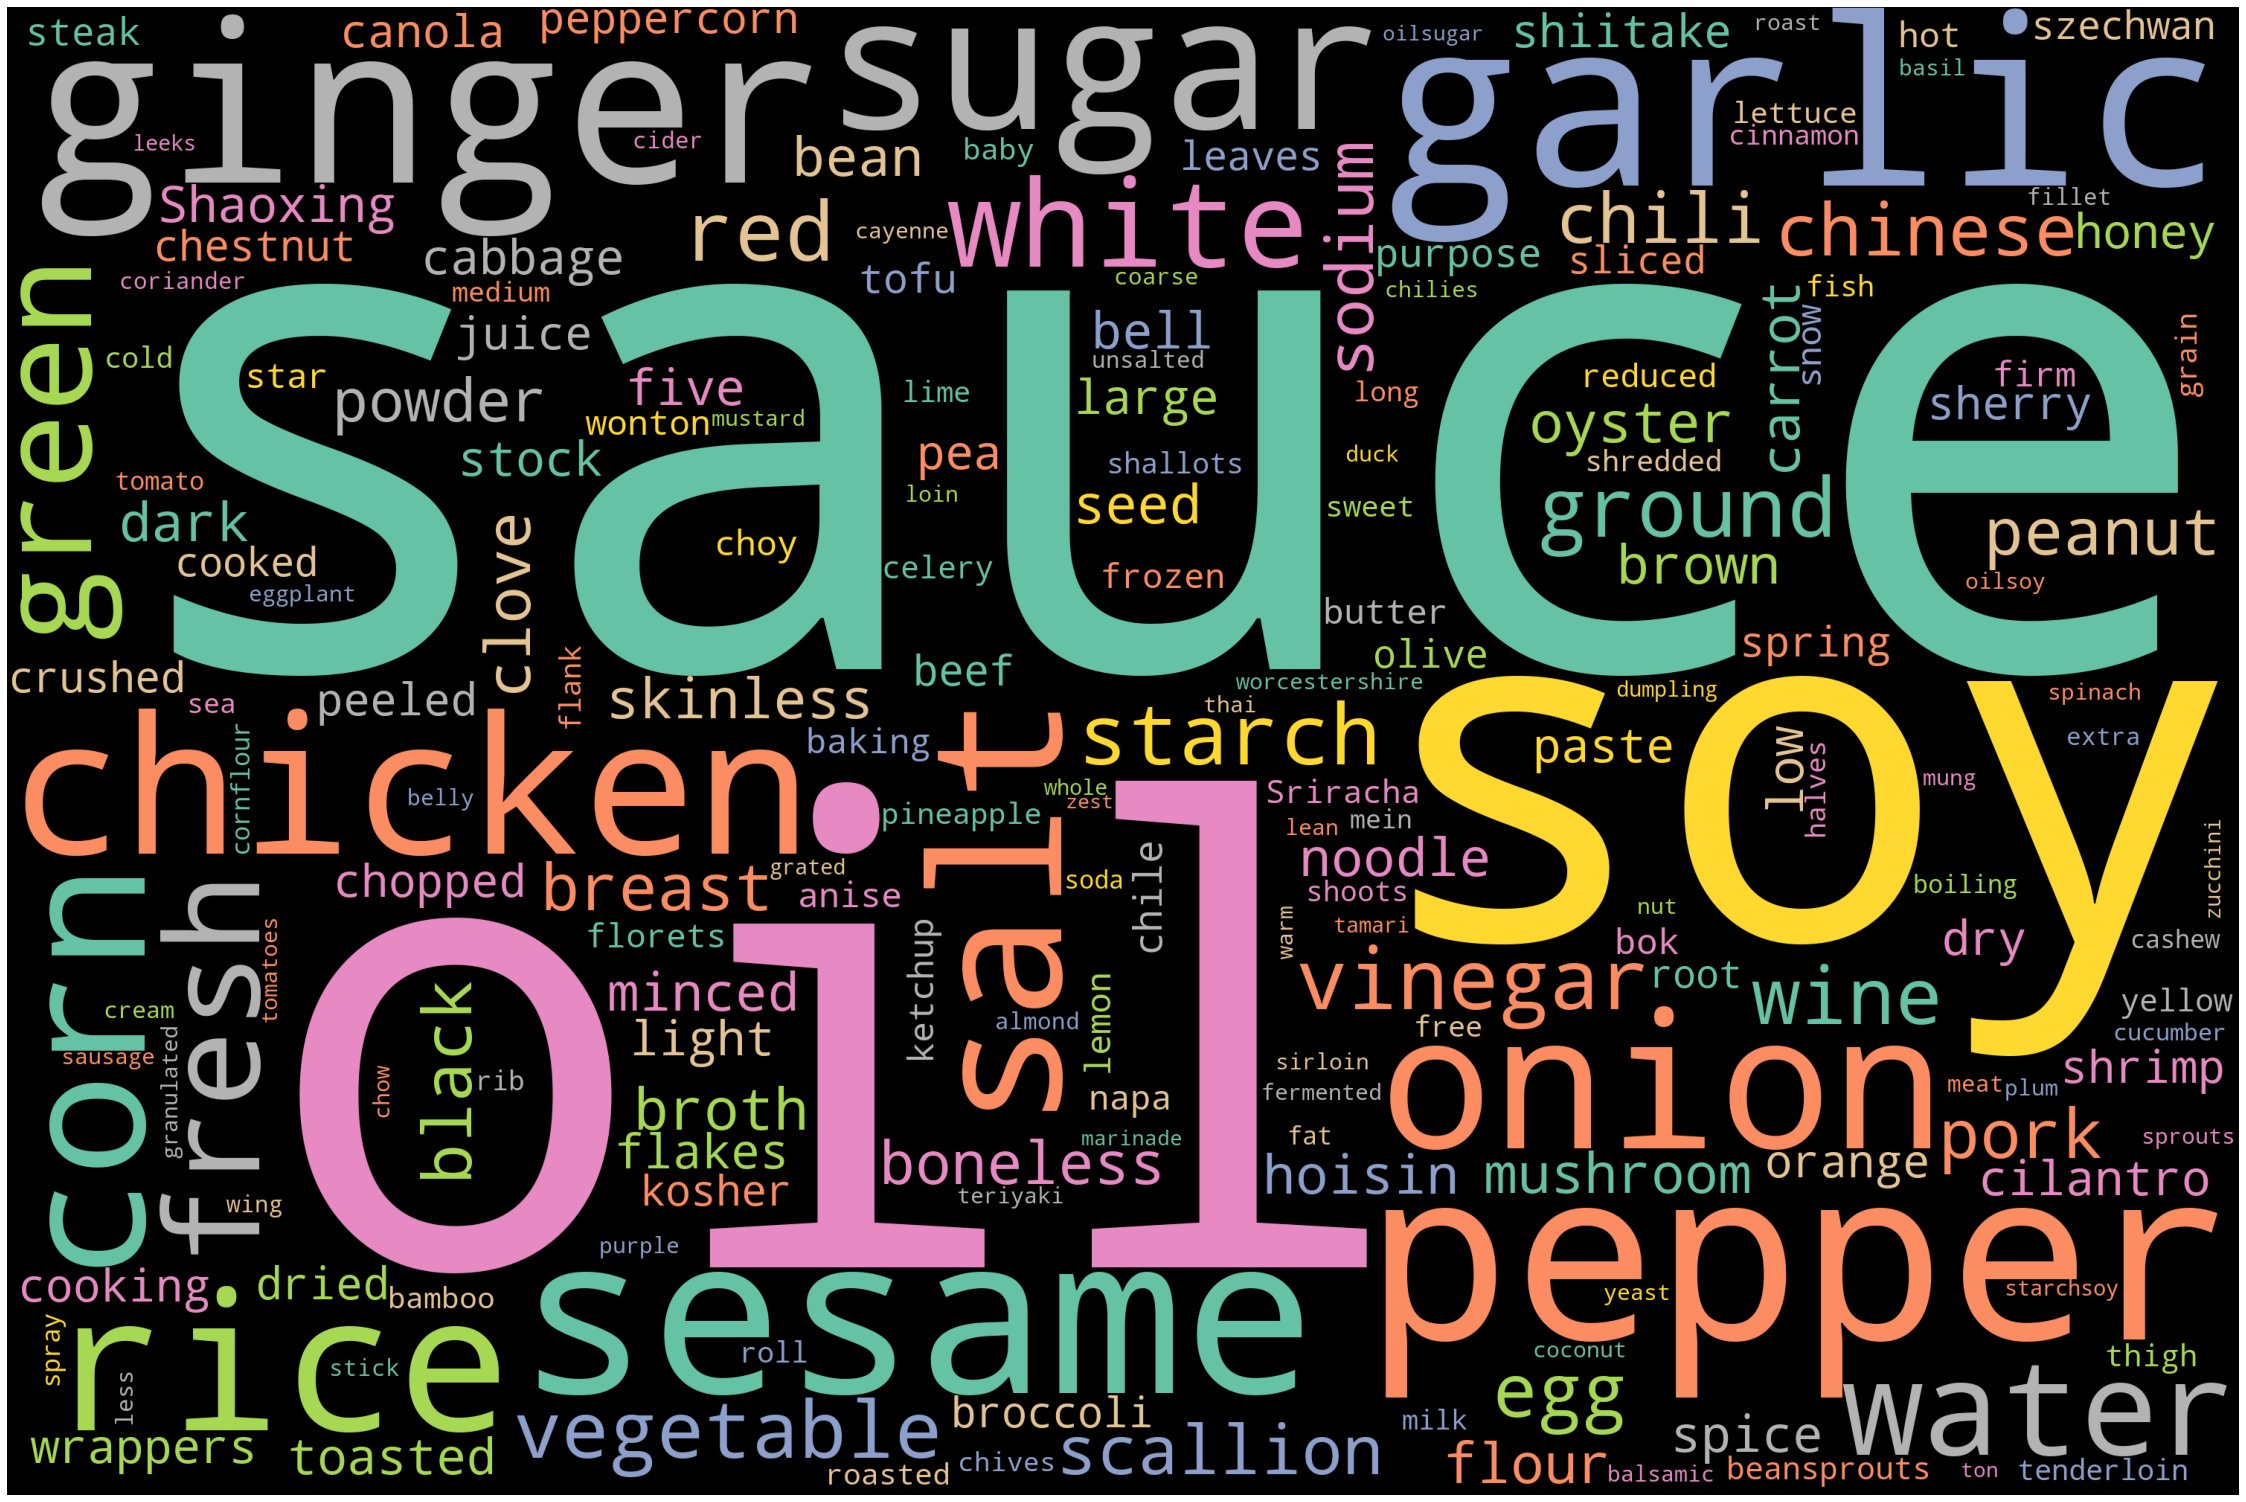

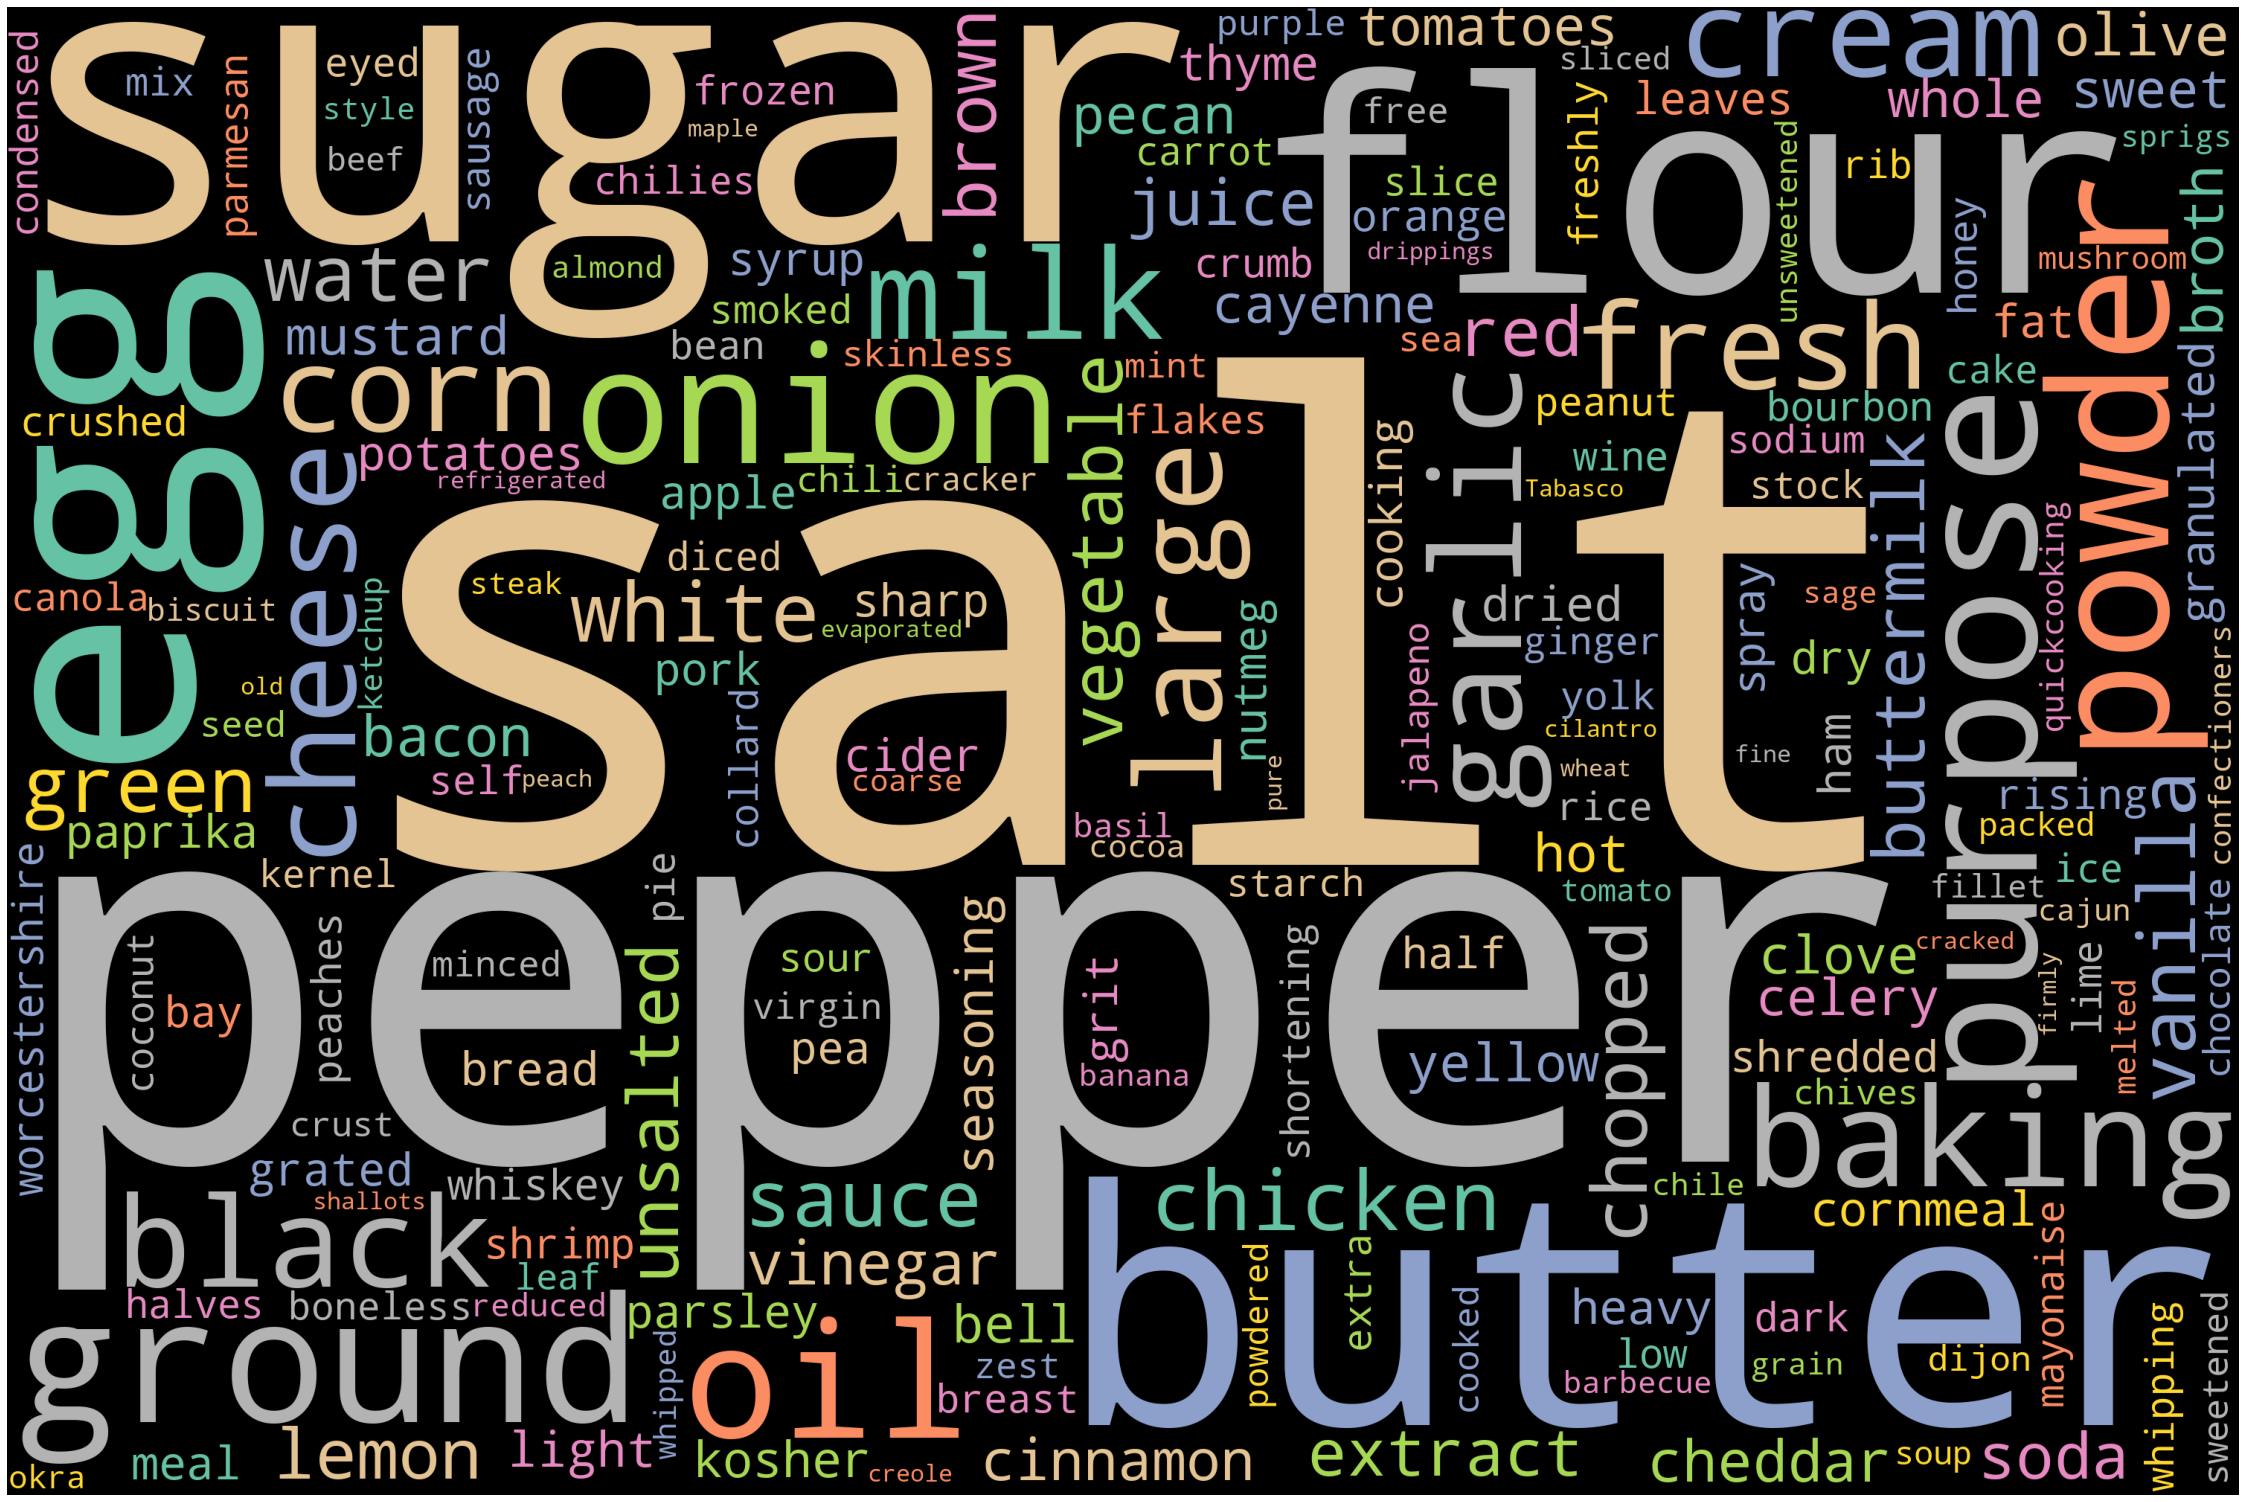

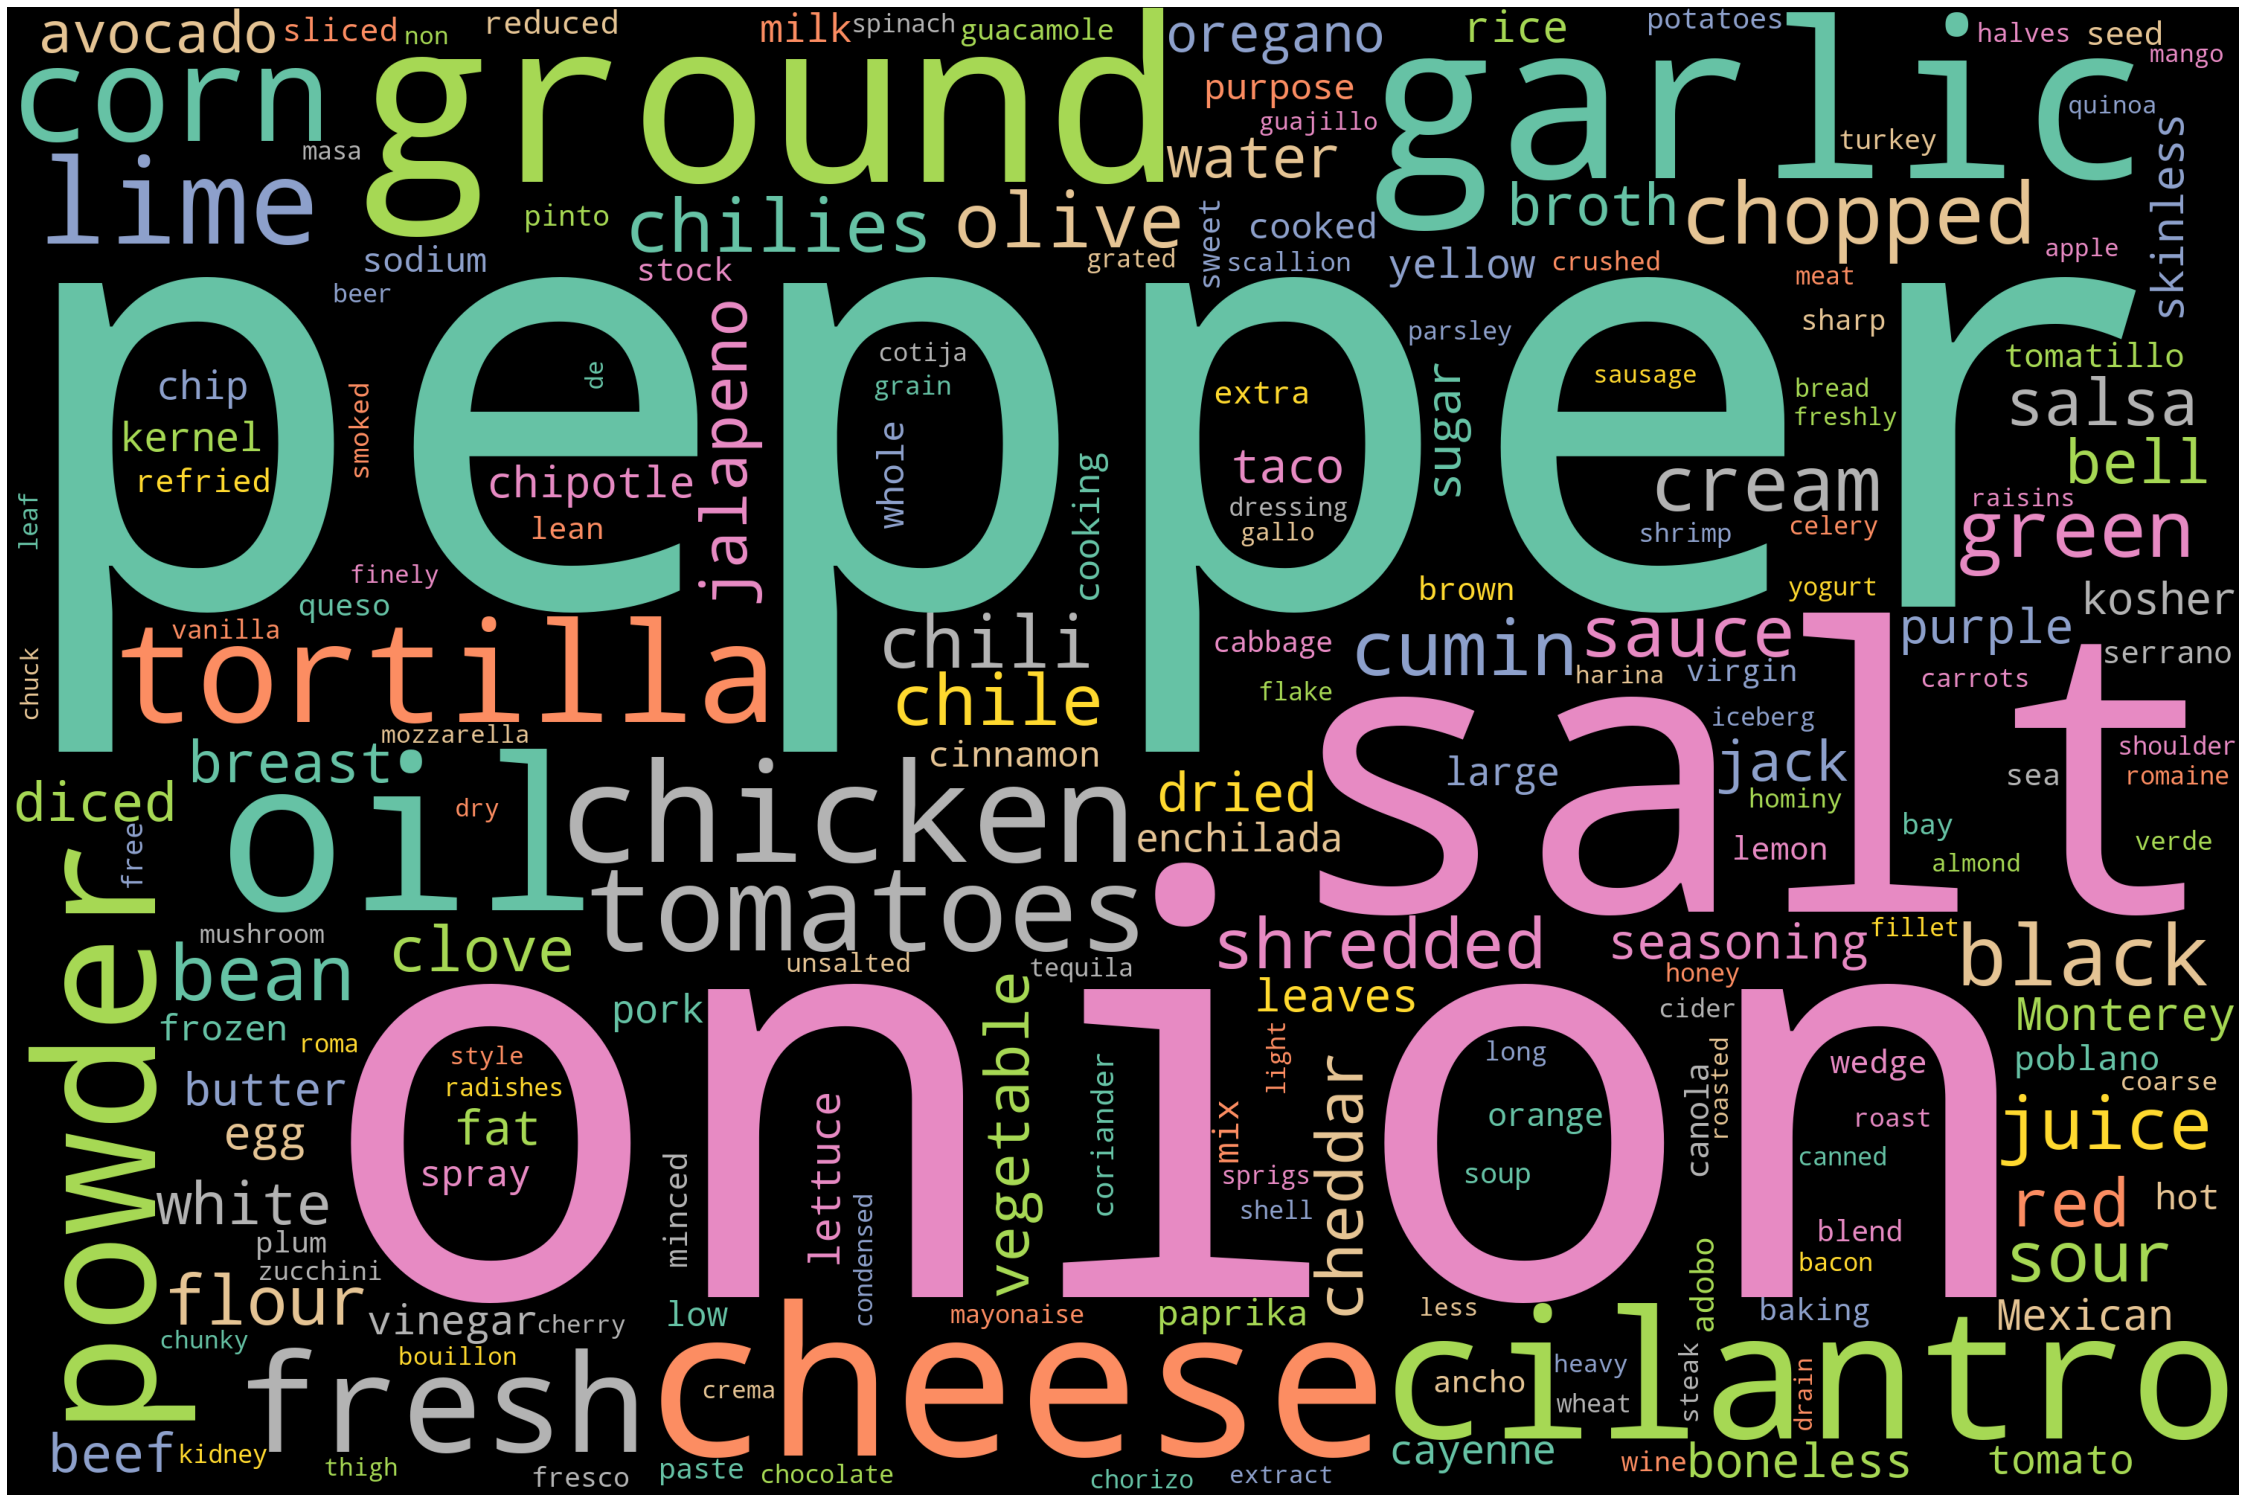

In [19]:
import random
import numpy as np
import os
 
def return_index(ing, s):
  lo = 0
  hi = len(ing) - 1
  while lo < hi:
    mid = (lo + hi) // 2;
    if s > ing[mid]:
      lo = mid + 1;
    else:
      hi = mid
  return mid
 
 
def generiraj(countries=None):
    ing = [x for t in train['ingredients'] for x in t]
    ing.sort()
    ing = list(dict.fromkeys(ing))
    ing.sort()
    random.seed(1234)
    selected = []
    for index, row in train.iterrows():
        if countries is None or row['cuisine'] in countries:
            if random.randint(1, 4) == 2:
              selected.append((row['cuisine'], row['ingredients']))
    mat = np.zeros(shape=(len(selected), len(ing)), dtype=int)
    for i in range(len(selected)):
      for t in selected[i][1]:
        mat[i][return_index(ing, t)] = 1
    vec = [x[0] for x in selected]
    if countries is None:
        ime = 'all'
    else:
        ime = '_'.join(countries);
    directory = 'embeddings/' + ime;
    if not os.path.exists(directory):
        os.makedirs(directory)
    np.savetxt('embeddings/' + ime + '/data_matrix.tsv', mat, delimiter='\t')
    with open('embeddings/' + ime + '/countries.tsv', 'w') as f:
        for item in vec:
            print(item, file=f)
    print("spremljeno!")
 
from wordcloud import WordCloud, STOPWORDS # 1.8.1

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
 
def explore(country):
    text = "";
    for index, row in train.iterrows():
        if country == row['cuisine']:
            text += ' '.join(row['ingredients'])
            
    # Generate wordcloud
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
    # Plot
    plot_cloud(wordcloud)
    
explore('italian')
explore('chinese')
explore('southern_us')
explore('mexican')